In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline
import math
import dlib
import cv2
import skvideo.io

In [41]:
import skvideo
skvideo.setFFmpegPath("C:\FFmpeg\bin")
import skvideo.io

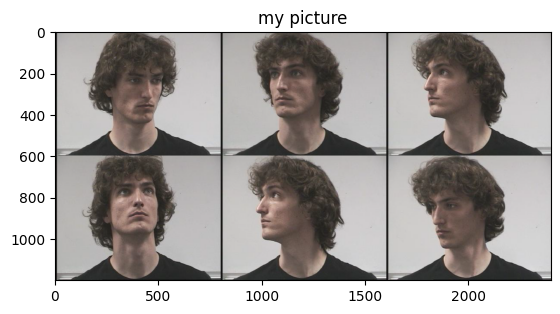

In [2]:
#TEST PICTURE
img = cv2.imread('data/test2.png')
test = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(test)
plt.title('my picture')
plt.show()

In [2]:
#Model for face detect
predictor_path = 'shape_predictor_68_face_landmarks.dat'

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

In [7]:
def analyseFace( img, quality=1, offset=(0,0)):
    dets = detector(np.array(img), quality)
    result=[]
    for k, d in enumerate(dets):
        instantFacePOI = np.zeros((7,2),dtype=np.float32)
        eyeCorners=np.zeros((2,2,2),dtype=np.float32)
        # Get the landmarks/parts for the face in box d.
        shape = predictor(np.array(img), d)
        #oreille droite
        instantFacePOI[0][0]=shape.part(0).x+offset[0];
        instantFacePOI[0][1]=shape.part(0).y+offset[1];
        #oreille gauche
        instantFacePOI[1][0]=shape.part(16).x+offset[0];
        instantFacePOI[1][1]=shape.part(16).y+offset[1];
        #nez
        instantFacePOI[2][0]=shape.part(30).x+offset[0];
        instantFacePOI[2][1]=shape.part(30).y+offset[1];
        #bouche gauche
        instantFacePOI[3][0]=shape.part(48).x+offset[0];
        instantFacePOI[3][1]=shape.part(48).y+offset[1];
        #bouche droite
        instantFacePOI[4][0]=shape.part(54).x+offset[0];
        instantFacePOI[4][1]=shape.part(54).y+offset[1];

        leftEyeX=0
        leftEyeY=0
        for i in range(36, 42):
            leftEyeX+=shape.part(i).x
            leftEyeY+=shape.part(i).y
        leftEyeX=int(leftEyeX/6.0)
        leftEyeY=int(leftEyeY/6.0)
        eyeCorners[0][0]=[shape.part(36).x+offset[0],shape.part(36).y+offset[1]]
        eyeCorners[0][1]=[shape.part(39).x+offset[0],shape.part(39).y+offset[1]]

        instantFacePOI[5][0]=leftEyeX+offset[0];
        instantFacePOI[5][1]=leftEyeY+offset[1];

        rightEyeX=0
        rightEyeY=0
        for i in range(42, 48):
            rightEyeX+=shape.part(i).x
            rightEyeY+=shape.part(i).y
        rightEyeX=int(rightEyeX/6.0)
        rightEyeY=int(rightEyeY/6.0)
        eyeCorners[1][0]=[shape.part(42).x+offset[0],shape.part(42).y+offset[1]]
        eyeCorners[1][1]=[shape.part(45).x+offset[0],shape.part(45).y+offset[1]]
        instantFacePOI[6][0]=rightEyeX+offset[0];
        instantFacePOI[6][1]=rightEyeY+offset[1];
        data=[instantFacePOI, (int(d.left()+offset[0]),int(d.top()+offset[1]),int(d.right()+offset[0]),int(d.bottom()+offset[1])),eyeCorners]
        result.append(data)
    return result

In [9]:
cap = skvideo.io.vreader('data/test.mp4')

In [10]:
## 각 frame마다 얼굴 찾고, landmark 찍기
for frame in cap:    
    ## RGB에서 BGR로 바꾸기 
    img = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    
    ## resize할 비율 구하기
    r = 200. / img.shape[1]
    dim = (200, int(img.shape[0] * r))  

    ## resize하기  
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

    ## 얼굴 detection
    rects = detector(resized, 1)
    for i, rect in enumerate(rects):

        ## 찾은 얼굴의 박스좌표
        l = rect.left()
        t = rect.top()
        b = rect.bottom()
        r = rect.right()

        ## facial landmark 찾기
        shape = predictor(resized, rect)

        ## facial landmark를 빨간색 점으로 찍어서 표현
        for j in range(68):
            x, y = shape.part(j).x, shape.part(j).y
            cv2.circle(resized, (x, y), 1, (0, 0, 255), -1)

        ## 얼굴이 있는 부분을 박스쳐주기
        cv2.rectangle(resized, (l, t), (r, b), (0, 255, 0), 2)

        ## 처리된 이미지 보여주기
        cv2.imshow('frame', resized)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [44]:
cv2.destroyAllWindows()

In [15]:
faces_data= analyseFace(test)
print(len(faces_data))

6


In [13]:
# import the necessary packages
from imutils.video import VideoStream
from imutils import face_utils
import datetime
import argparse
import imutils
import time
import dlib
import cv2

In [20]:
# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-p", "--shape-predictor", required=True,
	help="path to facial landmark predictor")
ap.add_argument("-r", "--picamera", type=int, default=-1,
	help="whether or not the Raspberry Pi camera should be used")
#args = vars(ap.parse_args())
args = vars(ap.parse_known_args())

TypeError: vars() argument must have __dict__ attribute